# Level 4 Python
--------------|-------|
|Danylo Zdoryk| 233305|
|Dmytro Shelest| 226453|
|Gracjan Grala| 210192|
|Jan Kisielewicz| 210221|


## Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Projects\ppdzd\\athlete_events.csv")
# Showing columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# Exercise 1
### 1.1 Prepare a summary of the total number of competitors at the Summer and Winter Olympics in the following years.

In [3]:
participants_1 = df[['Year', 'ID']].groupby('Year').count().reset_index().rename(columns={"ID":"Amount"})
participants_1

,Year,Amount
0,1896,380
1,1900,1936
2,1904,1301
3,1906,1733
4,1908,3101
5,1912,4040
6,1920,4292
7,1924,5693
8,1928,5574
9,1932,3321


# Visualization

## 1 Variant

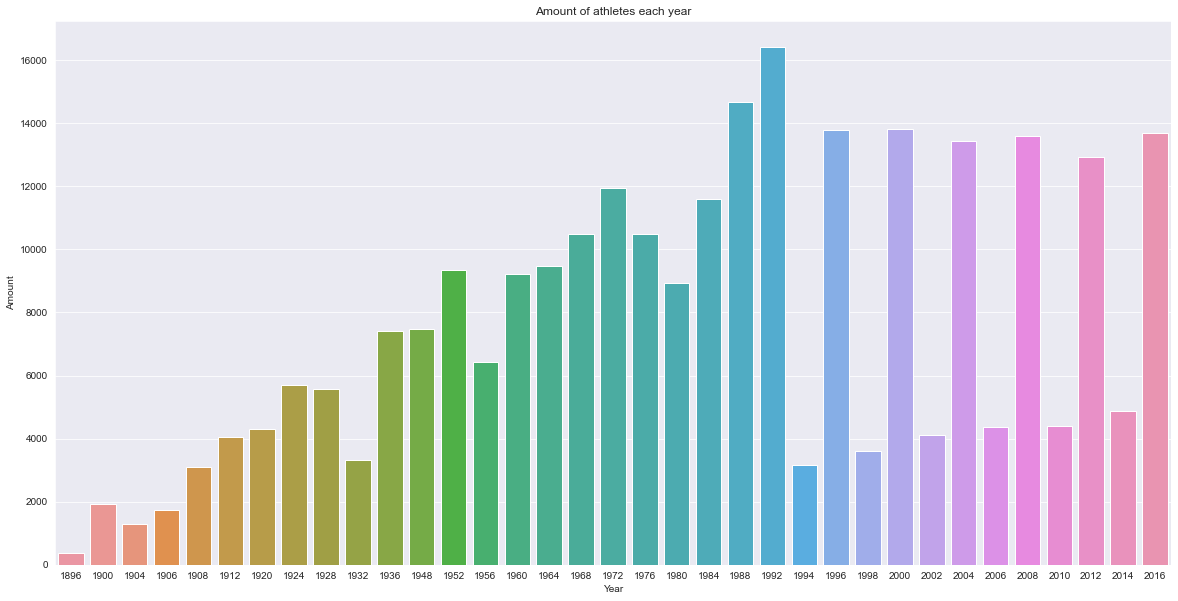

In [4]:
plt.figure(figsize=(20,10))
plt.title('Amount of athletes each year')
plt.xlabel('Year')
plt.ylabel('Number of athletes')
sns.barplot(x=participants_1.Year, y=participants_1.Amount)
plt.show()

## 2 Variant

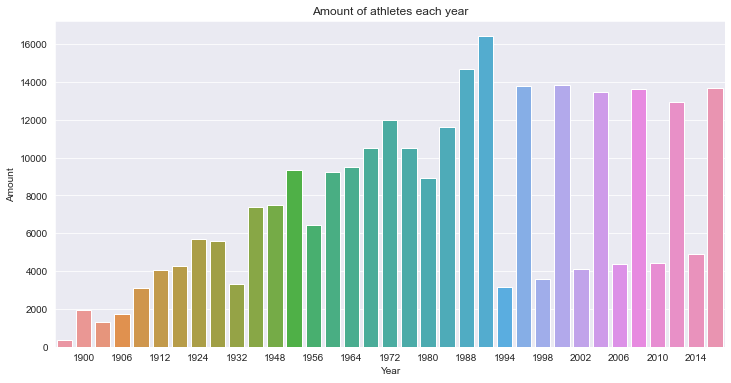

In [5]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.title('Amount of athletes each year')
plt.xlabel('Year')
plt.ylabel('Number of athletes')
sns.barplot(x=participants_1.Year, y=participants_1.Amount)
pos1 = ax.get_position()
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.show()

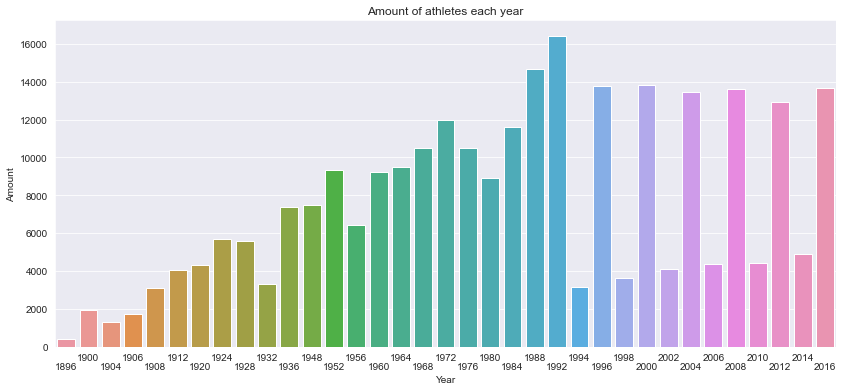

In [6]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
plt.title('Amount of athletes each year')
plt.xlabel('Year')
plt.ylabel('Number of athletes')
sns.barplot(x=participants_1.Year, y=participants_1.Amount)
pos1 = ax.get_position()
for label in ax.xaxis.get_ticklabels()[::2]:
    pos2 = [pos1.x0, pos1.y0 - 0.15,  pos1.width, pos1.height]
    label.set_position(pos2)
plt.show()

### 1.2 Prepare a table showing the average number of women and men competing in the Summer Olympics for each National Olympic Committee.

In [7]:
gender_amount = df[df.Season == 'Summer'].groupby(['NOC','Sex','Year']).size().reset_index().rename(columns={0:"Amount"})
pd.set_option("display.precision", 3)
result = gender_amount.drop('Year', axis=1).groupby(['NOC', 'Sex']).mean().reset_index()
result

,NOC,Sex,Amount
0,AFG,F,1.250
1,AFG,M,8.643
2,AHO,F,2.400
3,AHO,M,4.769
4,ALB,F,3.125
...,...,...,...
447,YUG,M,109.312
448,ZAM,F,2.111
449,ZAM,M,12.615
450,ZIM,F,9.417


# Visualization

### I don't know how to visualize this, at least at this moment ((

### 1.3 Prepare a list of the 5 National Olympic Committees that put together the largest number of different competitors and the number of their competitors depending on the number of Olympics in which the competitor participated.